In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb


In [77]:
csvfile1 = 'raw_data/city_data.csv'
csvfile2 = 'raw_data/ride_data.csv'
city_data_df = pd.read_csv(csvfile1)

ride_data = pd.read_csv(csvfile2)
pyber_data = pd.merge(ride_data, city_data, on="city")
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [78]:
total_rides = pyber_data.groupby('city')['ride_id'].count()
driver_count = pyber_data.groupby('city')['driver_count'].mean()
average_fare = pyber_data.groupby('city')['fare'].mean()
total_fare = pyber_data.groupby('city')['fare'].sum()
city_type = pyber_data.groupby('city')['type'].unique()

In [79]:
newdf = pd.DataFrame({'total rides': total_rides, 'driver count': driver_count, 'average fare': average_fare, 'total fare': total_fare, 'city type': city_type})
newdf.head()

,total rides,driver count,average fare,total fare,city type
city,,,,,
Amandaburgh,18,12,24.641667,443.55,[Urban]
Barajasview,22,26,25.332273,557.31,[Urban]
Barronchester,16,11,36.422500,582.76,[Suburban]
Bethanyland,18,22,32.956111,593.21,[Suburban]
Bradshawfurt,10,7,40.064000,400.64,[Rural]


In [80]:
#Urban
urban  =  newdf.loc[newdf["city type"]== "Urban"]
#suburban
suburban = newdf.loc[newdf["city type"]== "Suburban"]
#rural
rural = newdf.loc[newdf["city type"]== "Rural"]


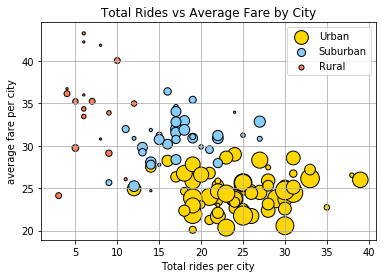

In [123]:
plt.scatter(urban['total rides'], urban['average fare'], s= urban['driver count']*5, color = "gold", edgecolors="black", label= 'Urban')
plt.scatter(suburban['total rides'], suburban['average fare'], s= suburban['driver count']*5, color = "lightskyblue", edgecolors="black", label= 'Suburban')
plt.scatter(rural['total rides'], rural['average fare'], s= rural['driver count']*5, color = "coral", edgecolors="black", label= 'Rural')
plt.legend()
plt.xlabel('Total rides per city')
plt.ylabel('average fare per city')
plt.title('Total Rides vs Average Fare by City')
plt.grid()

1) Fares are higher in rural areas than they are elsewhere and urban areas have the lowest fares. this can most likely be attributed to the distance travelled since things are closer together in larger cities. 
2) Urban areas have the highest amount of drivers, most likely due to the demand for rides being higher due to population which is also reflected in the chart.
3) Some urban and suburban cities have given more rides than others despite having fewer drivers available. there seems to be no direct correlation between the two.
4) based on pie charts city type seems to be the main determinant in driver count, average fair, and number of rides, as the data for each pie chart is very similar. 

Text(0.5,1,'% of Total Fares by City Type')

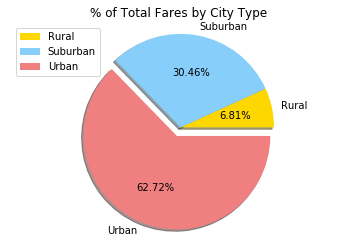

In [106]:
farepie = pyber_data.groupby(['type'])['fare'].sum()
labels = pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(farepie, explode= explode, colors= colors, labels= labels, autopct= "%1.2f%%", shadow = True)
plt.axis("equal")
plt.legend()
plt.title('% of Total Fares by City Type')

Text(0.5,1,'% of Total Drivers by City Type')

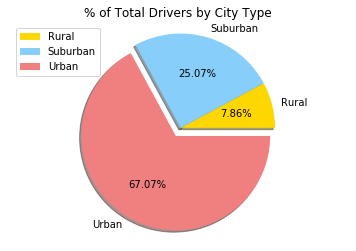

In [121]:
driverpie = pyber_data.groupby(['type'])['driver_count'].mean()

plt.pie(driverpie, explode= explode, colors= colors, labels= labels, autopct= "%1.2f%%", shadow = True)
plt.axis("equal")
plt.legend()
plt.title('% of Total Drivers by City Type')

Text(0.5,1,'% of Total Rides by City Type')

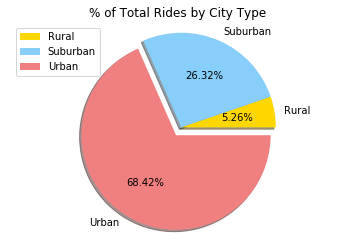

In [122]:
ridepie = pyber_data.groupby(['type'])['ride_id'].count()
labels = pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(ridepie, explode= explode, colors= colors, labels= labels, autopct= "%1.2f%%", shadow = True)
plt.axis("equal")
plt.legend()
plt.title('% of Total Rides by City Type')